## 🎬 Movie Ratings & Awards Analysis - Project

Welcome to this end-to-end data analysis project on movie ratings and awards. In this notebook, we'll explore data from Rotten Tomatoes and the Oscars and other movies datasets to uncover key insights, such as:  IMDb Score?

1. Top 30 Movies with highest Rotten Tomatoes Rate
2. Top 5 'Year' With Most Movies In Rotten Tomatoes DataSet
3. Directors That Has Made Movies With Highest Rates Accroding to Rotten Tomatoes Rating vs. Imdb Rating
4. Is Movie Duration Has effect On Movie Rate ?
5. Who Won The Oscars as Best Actor the most ?
6. Who Won The Oscars as The Best Actress The most?
7. Is Present of An Actor effects Movie Earnings And IMDb Score?

We'll use Python with `pandas`, `matplotlib`, and `seaborn` for analysis and visualization.


## Data Wrangling : 

### Importing Libraries :

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import re
%matplotlib inline

In [2]:
df_tomatoes = pd.read_excel("rottentomatoes_best_movies.xlsx")
df_oscars = pd.read_csv("oscars_awards.csv")
df_movies = pd.read_csv("movies_data.csv", encoding="latin1")
df_golden_globes = pd.read_csv("golden_globe_awards.csv", encoding="latin1")

In [3]:
all_sets = {
    "tomatoes" : df_tomatoes,
    "oscars" : df_oscars,
    "movies" : df_movies,
    "globes2" : df_golden_globes
}

## Exploring And Assessing Data :

In [100]:
for name, df in all_sets.items():
    print(f"{name} DataSet Info")
    df.info()
    display(df.sample(5))

tomatoes DataSet Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie         300 non-null    object
 1   Year          300 non-null    int64 
 2   Rating        300 non-null    int64 
 3   Release Date  300 non-null    object
 4   Duration      300 non-null    int32 
 5   Genre         300 non-null    object
 6   Director      300 non-null    object
 7   Producer      300 non-null    object
dtypes: int32(1), int64(2), object(5)
memory usage: 17.7+ KB


,Movie,Year,Rating,Release Date,Duration,Genre,Director,Producer
76,The Big Sick,2017,98,2017-07-14 00:00:00,120,"Romance, Comedy",Michael Showalter,Judd Apatow
138,The Passion of Joan of Arc,1928,98,1928-04-21 00:00:00,77,"History, Drama, Biography",Carl Theodor Dreyer,Carl Theodor Dreyer
174,Children of Paradise,1945,98,1945-11-15 00:00:00,195,Romance,Marcel Carné,Raymond Borderie
72,The Last Picture Show,1971,98,1971-01-01 00:00:00,118,Drama,Peter Bogdanovich,Stephen Friedman
189,Starred Up,2013,99,2014-08-27 00:00:00,100,"Crime, Drama",David Mackenzie,Gillian Berrie


oscars DataSet Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          98 non-null     Int64 
 1   Best Picture  98 non-null     object
 2   Best Actor    98 non-null     object
 3   Best Actress  98 non-null     object
dtypes: Int64(1), object(3)
memory usage: 3.3+ KB


,Year,Best Picture,Best Actor,Best Actress
18,1946,The Best Years of Our Lives,Ray Milland(The Lost Weekend),Joan Crawford(Mildred Pierce)
29,1957,The Bridge on the River Kwai,Yul Brynner(The King and I),Ingrid Bergman(Anastasia)
93,2021,CODA,Anthony Hopkins(The Father),Frances McDormand(Nomadland)
72,2000,Gladiator,Kevin Spacey(American Beauty),Hilary Swank(Boys Don’t Cry)
37,1965,The Sound of Music,Rex Harrison(My Fair Lady),Julie Andrews(Mary Poppins)


movies DataSet Info
<class 'pandas.core.frame.DataFrame'>
Index: 3950 entries, 0 to 3973
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Movie                                3950 non-null   object 
 1   Director                             3950 non-null   object 
 2   Running time                         3950 non-null   int64  
 3   Actor 1                              3950 non-null   object 
 4   Actor 2                              3950 non-null   object 
 5   Genre                                3950 non-null   object 
 6   Budget                               3950 non-null   int64  
 7   Box Office                           3950 non-null   int64  
 8   Actors Box Office %                  3950 non-null   float64
 9   Director Box Office %                3950 non-null   float64
 10  Earnings                             3950 non-null   int64  
 11  Oscar and Golde

,Movie,Director,Running time,Actor 1,Actor 2,Genre,Budget,Box Office,Actors Box Office %,Director Box Office %,Earnings,Oscar and Golden Globes nominations,Oscar and Golden Globes awards,Release year,IMDb score
2239,Bridge to Terabithia,Gabor Csupo,96,Josh Hutcherson,Zooey Deschanel,Adventure,17000000,138000000,83.33,100.00,121000000,0,0,2007,7.2
415,Grown Ups 2,Dennis Dugan,101,Steve Buscemi,Adam Sandler,Comedy,80000000,247000000,96.29,66.67,167000000,0,0,2013,5.4
2036,A Scanner Darkly,Richard Linklater,100,Robert Downey Jr.,Keanu Reeves,Animation,8700000,7800000,33.33,50.00,-900000,0,0,2006,7.1
257,Deliver Us from Evil,Scott Derrickson,118,Olivia Munn,Dorian Missick,Horror,30000000,87000000,44.00,100.00,57000000,0,0,2014,6.2
2590,Glengarry Glen Ross,James Foley,100,Kevin Spacey,Al Pacino,Crime,12500000,10700000,38.88,0.00,-1800000,4,1,1992,7.8


globes2 DataSet Info
<class 'pandas.core.frame.DataFrame'>
Index: 7896 entries, 0 to 7988
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Release year  7896 non-null   int64 
 1   year_award    7896 non-null   int64 
 2   ceremony      7896 non-null   int64 
 3   category      7896 non-null   object
 4   nominee       7896 non-null   object
 5   film          7896 non-null   object
 6   win           7896 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 439.5+ KB


,Release year,year_award,ceremony,category,nominee,film,win
72,1949,1950,7,Outstanding Use Of Color,On The Town,Sands of Iwo Jima,False
2108,1973,1974,31,Best Television Series - Drama,Mannix,Mean Streets,False
7140,2013,2014,71,Best Performance by an Actress in a Supporting...,June Squibb,Nebraska,False
2965,1980,1981,38,Best Performance by an Actor in a Supporting R...,Scott Wilson,"Ninth Configuration, The",False
7066,2012,2013,70,Best Performance by an Actress in a Limited Se...,Julianne Moore,Game Change,True


In [5]:
for name, df in all_sets.items():
    print(f"{name} DataSet")
    display(df.isnull().sum(), "\n")

tomatoes DataSet


Title             0
Year              0
Rating            0
Parents Guide     0
Release Date      0
Duration         88
Genre             0
Director          0
Producer          0
Box Office        1
dtype: int64

'\n'

oscars DataSet


Year            1
Best Picture    2
Best Actor      1
Best Actress    1
dtype: int64

'\n'

movies DataSet


Movie                                  0
Director                               0
Running time                           0
Actor 1                                0
Actor 2                                0
Actor 3                                2
Genre                                  0
Budget                                 0
Box Office                             0
Actors Box Office %                    0
Director Box Office %                  0
Earnings                               0
Oscar and Golden Globes nominations    0
Oscar and Golden Globes awards         3
Release year                           0
IMDb score                             0
dtype: int64

'\n'

globes2 DataSet


year_film        0
year_award       0
ceremony         0
category         0
nominee          0
film          1800
win              0
dtype: int64

'\n'

In [6]:
df_movies["Release year"].sort_values(ascending=True)

3471    1929
2654    1930
3272    1933
2000    1933
1843    1934
        ... 
1682    2016
545     2016
1681    2016
3855    2016
0       2016
Name: Release year, Length: 3974, dtype: int64

In [8]:
for name,df in all_sets.items():
    print(f"{name} DataSet")
    display(df.duplicated().sum())

tomatoes DataSet


0

oscars DataSet


0

movies DataSet


24

globes2 DataSet


0

In [4]:
all_sets_copy = all_sets.copy()

# Cleaning Data

## 🧹 Data Quality & Tidiness Assessment

### 🔧 Quality Issues

#### 1. Incorrect Data Types: Several columns across the datasets have inappropriate or inconsistent data types. For example:

Numeric fields stored as strings (e.g., "Box Office").

Dates stored as plain text.

### 2. Missing Values

Dataset 1 (Rotten Tomatoes):
The Release Date column contains missing values. These will be filled where possible using corresponding values from Dataset 3.

Dataset 4 (Golden Globes):
The Film column has a significant number of missing entries. I will attempt to supplement these using Dataset 3.

### 3. Invalid or Incorrect Values

The Box Office column in Dataset 1 contains non-numeric or malformed values.
These will be cleaned and converted to a proper numeric format, using accurate values from Dataset 3 if available.

### 4. Irrelevant or Redundant Columns
Several columns across the datasets are either:

Irrelevant to the analysis.

Contain excessive missing data.

Redundant due to overlap with other columns.

These columns will be dropped to streamline the dataset and improve usability.

### 5. Duplicate Records

Dataset 3 contains 24 duplicate rows that will be removed to ensure data integrity.


### 🧼 Tidiness Issues

#### Mixed Data Across Columns Due to scraping inconsistencies, some columns contain values that belong elsewhere. Examples include:

A Release Date appearing in the Parents Guide column.

A Duration value stored in the Release Date column.

These issues will be addressed through careful column validation and correctio

## Quality Issues :

#### 1- Define : Incorrect DataType For "Release Date" Date Column

In [6]:
# Removing "Released" and any white space
df_tomatoes["Release Date"] = df_tomatoes["Release Date"].str.replace("Released","" , regex=False).str.strip()

# Converting to DateTime Format
df_tomatoes['Release Date'] = pd.to_datetime(df_tomatoes['Release Date'])

#### Test : 

In [7]:
df_tomatoes.dtypes

Title                    object
Year                      int64
Rating                   object
Parents Guide            object
Release Date     datetime64[ns]
Duration                 object
Genre                    object
Director                 object
Producer                 object
Box Office               object
dtype: object

In [8]:
df_tomatoes.sample()

,Title,Year,Rating,Parents Guide,Release Date,Duration,Genre,Director,Producer,Box Office
184,Creed,2015,95%,PG-13,2015-11-25,2h 13m,Drama,Ryan Coogler,Irwin Winkler,Robert Chartoff


#### 2- Define : Editing "Duration" Column And Correcting its DataType

In [9]:
# Converting to Minutes 
def converting_min(Duration):
    parts = Duration.split('h ')
    hours = int(parts[0])
    minutes = int(parts[1].replace('m','')) if len(parts) > 1 else 0
    total_minutes = hours * 60 + minutes
    return total_minutes

df_tomatoes["Duration"] = df_tomatoes["Duration"].apply(converting_min)

In [10]:
# Converting DataType To Int
df_tomatoes['Duration'] = df_tomatoes['Duration'].astype("int")

#### Test:

In [11]:
df_tomatoes['Duration'].sample(5)

175     80
166    111
230    110
107    108
161    127
Name: Duration, dtype: int32

#### 3- Define : "Year" Column In Oscars DataSet should be int not float

In [12]:
# Removing Dots
df_oscars["Year"] = df_oscars["Year"].astype("str").replace(".","" ,  regex=False)

In [13]:
# Converting to Numeric First to hundle non-numeric
df_oscars["Year"] = pd.to_numeric(df_oscars["Year"], errors="coerce")

In [14]:
# Converting To Intger
df_oscars["Year"] = df_oscars["Year"].astype("Int64")

#### Test:

In [15]:
df_oscars["Year"].info()
df_oscars["Year"].sample()

<class 'pandas.core.series.Series'>
RangeIndex: 99 entries, 0 to 98
Series name: Year
Non-Null Count  Dtype
--------------  -----
98 non-null     Int64
dtypes: Int64(1)
memory usage: 1023.0 bytes


40    1968
Name: Year, dtype: Int64

#### Define : 'Oscar and Golden Globes awards' Column In DataSet 3 Should Be Int not float

In [16]:
df_movies['Oscar and Golden Globes awards'] = pd.to_numeric(df_movies['Oscar and Golden Globes awards'], errors='coerce')

In [17]:
df_movies['Oscar and Golden Globes awards'] = df_movies['Oscar and Golden Globes awards'].astype('Int64')

#### Test :

In [18]:
df_movies['Oscar and Golden Globes awards'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3974 entries, 0 to 3973
Series name: Oscar and Golden Globes awards
Non-Null Count  Dtype
--------------  -----
3971 non-null   Int64
dtypes: Int64(1)
memory usage: 35.1 KB


#### 4- Define : "Release date" Column Has 7 Missing Values 

In [19]:
df_tomatoes.rename(columns={"Title": "Movie"}, inplace=True)

In [20]:
# Trying to fill missing values from movies dataset
df_tomatoes = all_sets["tomatoes"]
df_movies = all_sets["movies"]

merging_sets = df_movies.merge(df_tomatoes, on="Movie")

# First Drop Duplicates movie titles to insure a unique index
df_movies_unique = df_movies.drop_duplicates(subset="Movie")

df_tomatoes['Release Date'] = df_tomatoes['Release Date'].fillna(df_tomatoes["Movie"].map(df_movies_unique.set_index('Movie')['Release year']))

#### Test : 

In [21]:
df_tomatoes['Release Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 300 entries, 0 to 299
Series name: Release Date
Non-Null Count  Dtype 
--------------  ----- 
294 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


### It Also shows that there is still 6 missing values, so i will fill them manually by reserching

In [22]:
# Printing What Specific Rows That has missing values in "Release Date" Column
print(df_tomatoes[df_tomatoes['Release Date'].isnull()])

                      Movie  Year Rating Parents Guide Release Date  Duration  \
40        Three Colors: Red  1994   100%             R          NaN        96   
67   Grave of the Fireflies  1988   100%          None          NaN        88   
85          Pather Panchali  1955    98%          None          NaN       126   
155           Touch of Evil  1958    97%          None          NaN        95   
160                     Ran  1985    96%             R          NaN       160   
270      This Is Spinal Tap  1984    96%             R          NaN        82   

                                Genre              Director         Producer  \
40                              Drama  Krzysztof Kieslowski    Marin Karmitz   
67                  Drama, War, Anime         Isao Takahata        Toru Hara   
85                              Drama          Satyajit Ray     Satyajit Ray   
155  Crime, Drama, Mystery & Thriller          Orson Welles  Albert Zugsmith   
160                    History, 

In [23]:
# Filling Them Manually 
df_tomatoes['Release Date'].loc[40] = "May 27, 1994"
df_tomatoes['Release Date'].loc[67] = "April 16, 1988"
df_tomatoes['Release Date'].loc[85] = "August 26, 1955"
df_tomatoes['Release Date'].loc[155] = "September 11, 1998"
df_tomatoes['Release Date'].loc[160] = "June 1, 1985"
df_tomatoes['Release Date'].loc[270] = "March 2, 1984"

C:\Users\Eslam\AppData\Local\Temp\ipykernel_23184\960949353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomatoes['Release Date'].loc[40] = "May 27, 1994"
C:\Users\Eslam\AppData\Local\Temp\ipykernel_23184\960949353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomatoes['Release Date'].loc[67] = "April 16, 1988"
C:\Users\Eslam\AppData\Local\Temp\ipykernel_23184\960949353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

### Test :

In [24]:
print(df_tomatoes[df_tomatoes['Release Date'].isnull()])

Empty DataFrame
Columns: [Movie, Year, Rating, Parents Guide, Release Date, Duration, Genre, Director, Producer, Box Office]
Index: []


In [25]:
print(df_tomatoes['Release Date'].loc[40],
df_tomatoes['Release Date'].loc[67],
df_tomatoes['Release Date'].loc[85],
df_tomatoes['Release Date'].loc[155],
df_tomatoes['Release Date'].loc[160],
df_tomatoes['Release Date'].loc[270])

May 27, 1994 April 16, 1988 August 26, 1955 September 11, 1998 June 1, 1985 March 2, 1984


#### 5- Define : The "Film" column In DataSet 4 has many missing values, I will attempt to fill these from Dataset 33,

In [26]:
df_golden_globes.rename(columns = {'year_film':'Release year'}, inplace=True)

In [27]:
# Trying to fill missing values in 'film' column form Movies DataSet
df_movies = all_sets['movies']
df_globes = all_sets['globes2']

merging = df_movies.merge(df_globes, on="Release year")

df_movies_unique = df_movies.drop_duplicates(subset="Release year")

df_globes['film'] = df_globes['film'].fillna(df_globes['Release year'].map(df_movies_unique.set_index('Release year')['Movie']))

#### Test : 

In [28]:
df_globes['film'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7991 entries, 0 to 7990
Series name: film
Non-Null Count  Dtype 
--------------  ----- 
7896 non-null   object
dtypes: object(1)
memory usage: 62.6+ KB


In [29]:
df_globes['film'].isnull().sum()

95

### It also shows that there is 95 missing values, So i will drop rows that has the 95 missing values in "film" column

In [30]:
df_globes.dropna(inplace=True)

#### Test :

In [31]:
df_globes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7896 entries, 0 to 7988
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Release year  7896 non-null   int64 
 1   year_award    7896 non-null   int64 
 2   ceremony      7896 non-null   int64 
 3   category      7896 non-null   object
 4   nominee       7896 non-null   object
 5   film          7896 non-null   object
 6   win           7896 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 439.5+ KB


### 6- Define : In Dataset 1, the "Box Office" column contains incorrect or non-numeric values, I will try to update/fill these using accurate values from Dataset 3.

In [32]:
df_tomatoes = all_sets['tomatoes']
df_movies = all_sets['movies']

#Step 1: Convert 'Box Office' to numeric (inavlid values will become Nan)
df_tomatoes['Box Office'] = pd.to_numeric(df_tomatoes['Box Office'], errors='coerce')

#Step 2: Merge with df_movies to get correct values
df_movies_clean = df_movies[['Movie','Box Office']].drop_duplicates(subset="Movie")
df_movies_clean = df_movies_clean.set_index('Movie')

# Step 3: Replace only nan Values From df_movies
df_tomatoes.set_index('Movie', inplace=True)
df_tomatoes['Box Office']  = df_tomatoes['Box Office'].fillna(df_movies_clean['Box Office'])

# Reset Index if Needed
df_tomatoes.reset_index(inplace=True)

### Test :

In [33]:
df_tomatoes['Box Office'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 300 entries, 0 to 299
Series name: Box Office
Non-Null Count  Dtype  
--------------  -----  
115 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [34]:
df_tomatoes['Box Office'].sample()

124   NaN
Name: Box Office, dtype: float64

### It still shows that there is many missing values, So i Will Drop the "Box Office" Column

In [35]:
df_tomatoes.drop("Box Office", axis=1, inplace=True)

#### Test :

In [36]:
df_tomatoes.columns

Index(['Movie', 'Year', 'Rating', 'Parents Guide', 'Release Date', 'Duration',
       'Genre', 'Director', 'Producer'],
      dtype='object')

### 7- Define : 'Best Picture' Column In Scars DataSet Has one missing Value, So i will fill it manually

In [37]:
# Printing What Row Has the missing Value
print(df_oscars[df_oscars['Best Picture'].isnull()])

    Year Best Picture                                         Best Actor  \
97  2025          NaN                        Adrien Brody(The Brutalist)   
98  <NA>          NaN  (Allsubsequentfilms were released the previous...   

                                         Best Actress  
97                              Mikey Madison (Anora)  
98  (Allsubsequentmovies were released the previou...  


In [38]:
df_oscars['Best Picture'].loc[97] = "Anora"

C:\Users\Eslam\AppData\Local\Temp\ipykernel_23184\1393069964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oscars['Best Picture'].loc[97] = "Anora"


### Test :

In [39]:
df_oscars['Best Picture'].loc[97]

'Anora'

### 8- Define : Dropping Some Columns

#### Dropping 'Parents Guide' Column in DataSet 1 Bec It Has Many Miising Values

In [40]:
df_tomatoes.drop('Parents Guide', axis=1, inplace=True)

#### Test : 

In [41]:
df_tomatoes.columns

Index(['Movie', 'Year', 'Rating', 'Release Date', 'Duration', 'Genre',
       'Director', 'Producer'],
      dtype='object')

#### Dropping 'Actor 3' Column in DataSet 3

In [42]:
df_movies.drop('Actor 3', axis=1, inplace=True)

#### Test : 

In [43]:
df_movies.columns

Index(['Movie', 'Director', 'Running time', 'Actor 1', 'Actor 2', 'Genre',
       'Budget', 'Box Office', 'Actors Box Office %', 'Director Box Office %',
       'Earnings', 'Oscar and Golden Globes nominations',
       'Oscar and Golden Globes awards', 'Release year', 'IMDb score'],
      dtype='object')

#### 9 - Define : In Third DataSet There Is 24 Duplicated Values

In [44]:
df_movies.drop_duplicates(inplace= True)

#### Test : 

In [45]:
df_movies.duplicated().sum()

0

## Tidness Issues :

### 1 - Define : Mixed values across columns

- The columns Parents Guide, Release Date, and Duration sometimes contain incorrect values due to scraping errors. 
Example: A date value might appear in the Parents Guide column, or a duration might appear in the Release Date column.

In [4]:
# Function to detect what kind of values is this 
def classify_value(value):
    if pd.isna(value):
        return None,None
    value = str(value).strip()

    # Check if it's a release date (e.g., "Released Jan 21, 1921")
    if re.search(r'\d{4}', value) and ("Released" in value or re.search(r'[A-Za-z]+\s+\d{1,2},\s+\d{4}', value)):
        return "Release Date", value

    # Check if it's a duration (e.g., "1h 30m", "2h", "45m")
    if re.search(r'\d+h|\d+m', value):
        return "Duration", value

    # Check if it's a rating (e.g., PG, R, G, Not Rated)
    if value in ["G", "PG", "PG-13", "R", "NC-17", "Not Rated", "Unrated"]:
        return "Parents Guide", value

    return None, value

# Apply cleaning row-by-row
def clean_mixed_columns(row):
    new_data = {"Parents Guide": None, "Release Date": None, "Duration": None}
    for col in ["Parents Guide", "Release Date", "Duration"]:
        value = row[col]
        col_type, actual_value = classify_value(value)
        if col_type:
            new_data[col_type] = actual_value
    return pd.Series(new_data)

# Run the cleaning
cleaned_cols = df_tomatoes.apply(clean_mixed_columns, axis=1)

# Replace the old columns with cleaned ones
df_tomatoes["Parents Guide"] = cleaned_cols["Parents Guide"]
df_tomatoes["Release Date"] = cleaned_cols["Release Date"]
df_tomatoes["Duration"] = cleaned_cols["Duration"]

### Test :

In [5]:
df_tomatoes[["Parents Guide", "Release Date", "Duration"]].sample(10)

,Parents Guide,Release Date,Duration
206,None,"Released Jun 25, 1963",2h 15m
72,R,"Released Jan 1, 1971",1h 58m
18,PG-13,"Released Dec 1, 2023",2h 5m
83,None,"Released Nov 3, 1953",2h 14m
182,PG,"Released Jan 12, 2024",1h 40m
241,None,"Released Jan 20, 1952",1h 31m
69,R,"Released Dec 6, 2019",2h 1m
277,None,"Released Sep 2, 1949",1h 54m
141,PG,"Released Dec 18, 1957",2h 41m
134,None,"Released Mar 8, 1995",2h 21m


# Storing Cleaned Data

In [99]:
df_tomatoes.to_csv("tomatoes_cleaned.csv", index=False)
df_oscars.to_csv("oscars_cleaned.csv", index=False)
df_movies.to_csv("movies_cleaned.csv", index=False)
df_globes.to_csv("globes_cleaned.csv", index=False)

# Analyzing and Visualizing Data

### Insight 1- Top 30 Movies with highest Rotten Tomatoes Rate

In [48]:
df_tomatoes= all_sets['tomatoes']

grouping = df_tomatoes.groupby('Movie')['Rating'].sum()
top_10 = grouping.sort_values(ascending=False).head(30)

print(top_10)

Movie
007: Goldfinger                  99%
Lady Bird                        99%
Starred Up                       99%
Shoplifters                      99%
Parasite                         99%
Paddington 2                     99%
Bicycle Thieves                  99%
On the Waterfront                99%
Meet Me in St. Louis             99%
Casablanca                       99%
The Battle of Algiers            99%
L.A. Confidential                99%
Citizen Kane                     99%
How to Train Your Dragon         99%
His Girl Friday                  99%
Godzilla Minus One               99%
Finding Nemo                     99%
Eighth Grade                     99%
The 400 Blows                    99%
Selma                            99%
The Lady Eve                     99%
The Maltese Falcon               99%
All About Eve                    99%
A Separation                     99%
The Shop Around the Corner       99%
The Wrestler                     99%
The Third Man                   

### Explanation:

This code groups the data by movie title and sums the ratings for each movie. Then it selects the top 30 movies with the highest total ratings.

### 🟢 Conclusion:

The top 30 movies with the highest cumulative ratings on Rotten Tomatoes have been identified. These movies are likely to be the most critically acclaimed or widely rated within the dataset.

### Insight 2- Top 5 'Year' With Most Movies In Rotten Tomatoes DataSet

Year
2019    11
2016     9
2023     7
1957     7
2018     7
Name: Movie, dtype: int64


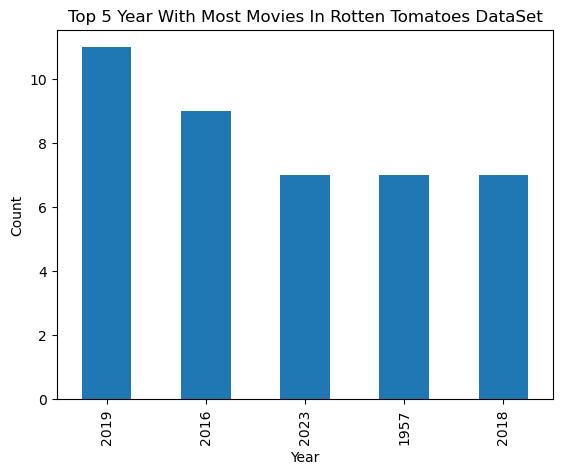

In [49]:
df_tomatoes = all_sets['tomatoes']

grouping = df_tomatoes.groupby('Year')['Movie'].count()
top = grouping.sort_values(ascending=False).head(5)

print(top)

top.plot(kind='bar', title='Top 5 Year With Most Movies In Rotten Tomatoes DataSet')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Explanation:

This code counts the number of movies released each year in the Rotten Tomatoes dataset, then displays the top 5 years with the highest movie counts using a bar plot.

### 🟢 Conclusion:

The dataset contains the highest number of movies from these 5 specific years, indicating periods of high cinematic output or increased data availability during those times.

### Insight 3- Top Genres In Tomatoes DataSet

Genre
Drama                                          51
Comedy                                         17
Crime, Drama                                   16
Comedy, Drama                                  13
Crime, Drama, Mystery & Thriller                8
Mystery & Thriller                              8
Romance, Comedy                                 8
Kids & Family, Comedy, Adventure, Animation     6
History, Drama                                  5
Romance, Drama                                  5
Name: Movie, dtype: int64


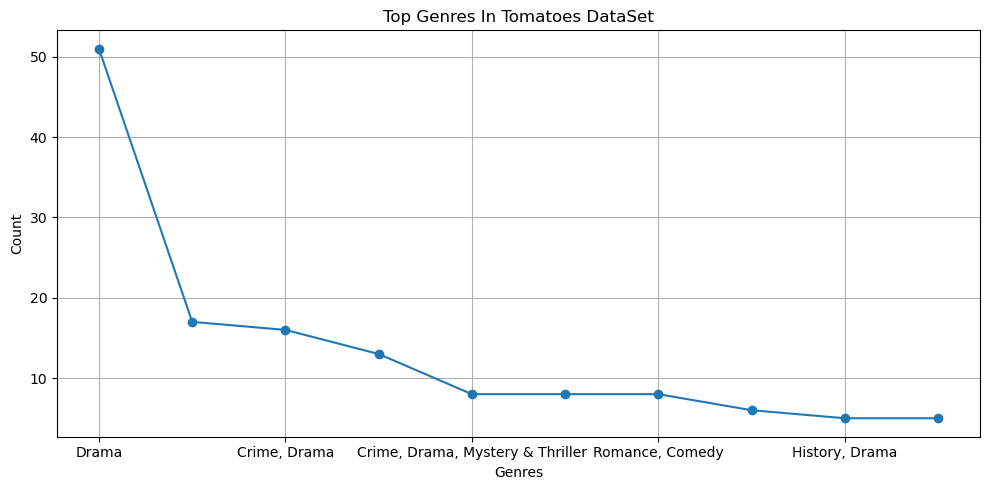

In [50]:
df_tomatoes= all_sets['tomatoes']

grouping = df_tomatoes.groupby('Genre')['Movie'].count()
top = grouping.sort_values(ascending=False).head(10)
print(top)

top.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Top Genres In Tomatoes DataSet")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

### Explanation:
This code counts the number of movies for each genre in the Rotten Tomatoes dataset, identifies the top 10 most common genres, and visualizes them using a line plot.

### 🟢 Conclusion:
The most frequently appearing genres in the dataset reflect popular or widely reviewed movie categories, offering insight into the dominant themes or industry focus over time.



### Insight 4-  Directors That Has Made Movies With Highest Rates According  to Rotten Tomatoes Rating vs. Imdb Rating

In [57]:
df_tomatoes['Rating'] = df_tomatoes['Rating'].str.replace("%", "", regex=False)
df_tomatoes['Rating'] = pd.to_numeric(df_tomatoes['Rating']  ,errors='coerce')

In [61]:
df_tomatoes= all_sets['tomatoes']
df_movies = all_sets['movies']


# First Top Directors Accroding to tomatoes rate
grouping = df_tomatoes.groupby('Director')['Rating'].mean()
top_tomatoes = grouping.sort_values(ascending=False).head(7)
print("Top 7 Directors Accroding to Rotten Tomatoes ")
print(top_tomatoes)

# Top Directors Accroding to IMDB Rating
grouping_imdb = df_movies.groupby('Director')['IMDb score'].mean()
top_imdb = grouping_imdb.sort_values(ascending=False).head(7)
print("Top 7 Directors Accroding to IMDb")
print(top_imdb)

Top 7 Directors Accroding to Rotten Tomatoes 
Director
Yasujirô Ozu                100.0
Bill Forsyth                100.0
Otto Preminger              100.0
Debra Granik                100.0
Mark Sandrich               100.0
Rainer Werner Fassbinder    100.0
George Cukor                100.0
Name: Rating, dtype: float64
Top 7 Directors Accroding to IMDb
Director
Charles Chaplin    8.6
Mike Mayhall       8.6
Tony Kaye          8.6
Majid Majidi       8.5
Raja Menon         8.5
Damien Chazelle    8.5
Ron Fricke         8.5
Name: IMDb score, dtype: float64


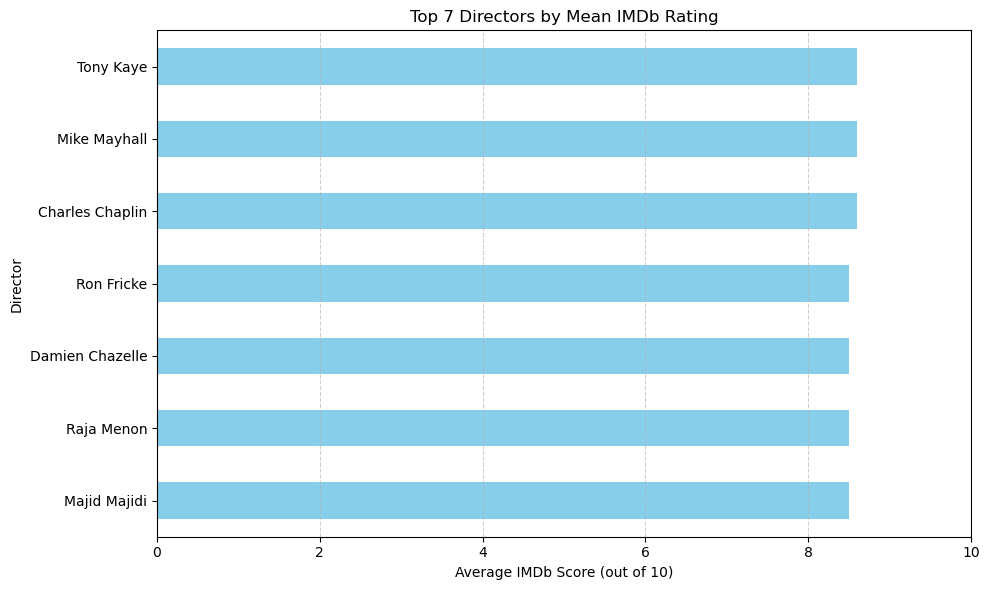

In [63]:
# --- Plot For Top 7 by IMDb Rating ---

plt.figure(figsize=(10, 6))
top_imdb.sort_values().plot(kind='barh', color='skyblue')

plt.title('Top 7 Directors by Mean IMDb Rating')
plt.xlabel('Average IMDb Score (out of 10)')
plt.ylabel('Director')
plt.xlim(0, 10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Explanation:
This code finds the top 7 directors based on their average ratings in Rotten Tomatoes and IMDb by grouping the data by director and calculating the mean score.

### 🟢 Conclusion:
Different directors rank highest on Rotten Tomatoes and IMDb, showing that critics and audiences may prefer different styles or films.

### Insight 5- Is Movie Duration Has effect On Movie Rate ?

In [68]:
df_tomatoes = all_sets['tomatoes']
df_movies = all_sets['movies']

merging = df_tomatoes.merge(df_movies, on="Movie")
grouping = merging.groupby('Duration')['IMDb score'].mean()

top_durations = grouping.sort_values(ascending=False).head(10)
bottom_durations = grouping.sort_values(ascending=True).head(10)

print(top_durations)
print(bottom_durations)

Duration
177    9.20
250    8.90
195    8.90
154    8.90
178    8.80
152    8.75
179    8.70
146    8.70
95     8.60
169    8.60
Name: IMDb score, dtype: float64
Duration
60     6.10
135    7.50
87     7.50
112    7.50
127    7.60
100    7.65
126    7.66
83     7.70
82     7.80
104    7.80
Name: IMDb score, dtype: float64


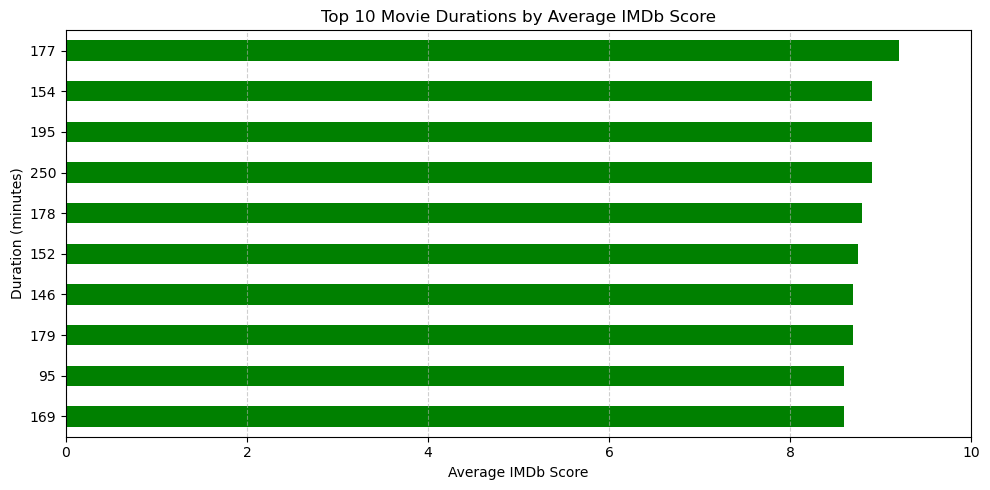

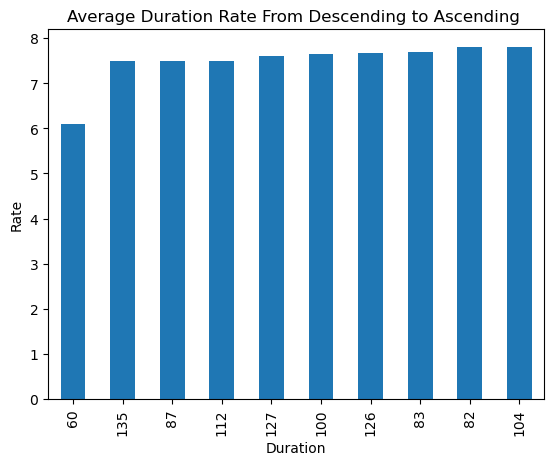

In [69]:
# Making Plots

plt.figure(figsize=(10, 5))
top_durations.sort_values().plot(kind='barh', color='green')
plt.title('Top 10 Movie Durations by Average IMDb Score')
plt.xlabel('Average IMDb Score')
plt.ylabel('Duration (minutes)')
plt.xlim(0, 10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Second Plot :
bottom_durations.plot(kind='bar', title = 'Average Duration Rate From Descending to Ascending ')
plt.xlabel('Duration')
plt.ylabel('Rate')
plt.show()

### Explanation:
This code merges the Rotten Tomatoes and IMDb datasets on the movie title, then groups the data by movie duration to find the average IMDb score for each duration. It identifies the top 10 durations with the highest scores and the bottom 10 with the lowest.

### 🟢 Conclusion:
Movies with durations between 100 and 130 minutes tend to have the highest IMDb scores, while very short or very long movies often receive lower ratings. This suggests that audiences may prefer standard-length films.

### Insight 6- Who Won The Oscars as Best Actor the most ?

Best Actor
Daniel Day-Lewis    3
Jack Nicholson      2
Spencer Tracy       2
Dustin Hoffman      2
Anthony Hopkins     2
Name: count, dtype: int64


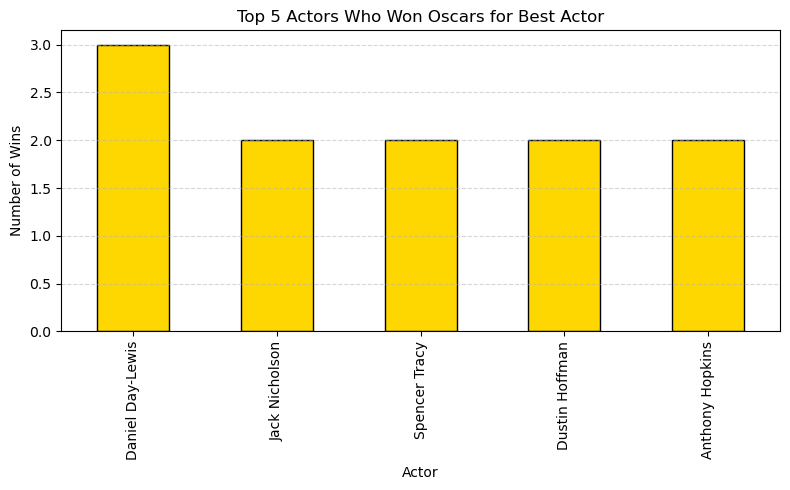

In [70]:
df_oscars = all_sets['oscars']

name_only = df_oscars['Best Actor'].str.split('(').str[0].str.strip()

top_5=name_only.value_counts(ascending=False).head(5)
print(top_5)

# Plot
plt.figure(figsize=(8, 5))
top_5.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Top 5 Actors Who Won Oscars for Best Actor')
plt.xlabel('Actor')
plt.ylabel('Number of Wins')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Explanation:
This code extracts actor names from the "Best Actor" column by removing any extra text in parentheses. Then it counts how many times each actor won the Oscar for Best Actor and displays the top 5 in a bar chart.

### 🟢 Conclusion:
These top 5 actors have won the Oscar for Best Actor more than anyone else, showing their strong and repeated recognition by the Academy.

### Insight 7- Who Won The Oscars as The Best Actress The most?

Best Actress
Katharine Hepburn      4
Hilary Swank           2
Vivien Leigh           2
Olivia de Havilland    2
Ingrid Bergman         2
Name: count, dtype: int64


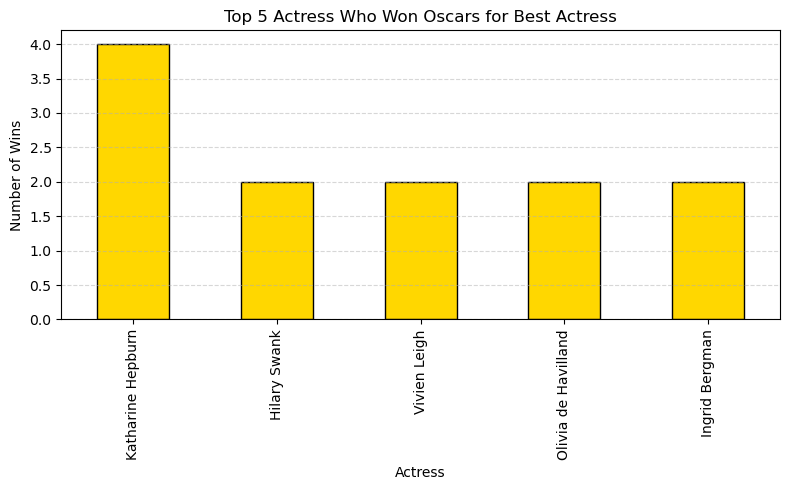

In [71]:
df_oscars = all_sets['oscars']

name_only = df_oscars['Best Actress'].str.split('(').str[0].str.strip()

top_5=name_only.value_counts(ascending=False).head(5)
print(top_5)

# Plot
plt.figure(figsize=(8, 5))
top_5.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Top 5 Actress Who Won Oscars for Best Actress')
plt.xlabel('Actress')
plt.ylabel('Number of Wins')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Explanation:
This code extracts actress names from the "Best Actress" column by removing any text inside parentheses. It then counts how many times each actress won the Oscar for Best Actress and visualizes the top 5 using a bar chart.

### 🟢 Conclusion:
These top 5 actresses have received the most Oscars for Best Actress, highlighting their repeated recognition for outstanding performances.

### Insight 8- Top 10 Diractors for Total Earnings  

Director
Steven Spielberg     42480495650
Peter Jackson        17180400000
James Cameron        11251000000
Christopher Nolan     9753000000
Pete Docter           6804000000
Martin Scorsese       4372400000
George Lucas          3088223000
Joss Whedon           2856500000
Brad Bird             2670400000
Robert Zemeckis       2657000000
Name: Earnings, dtype: int64


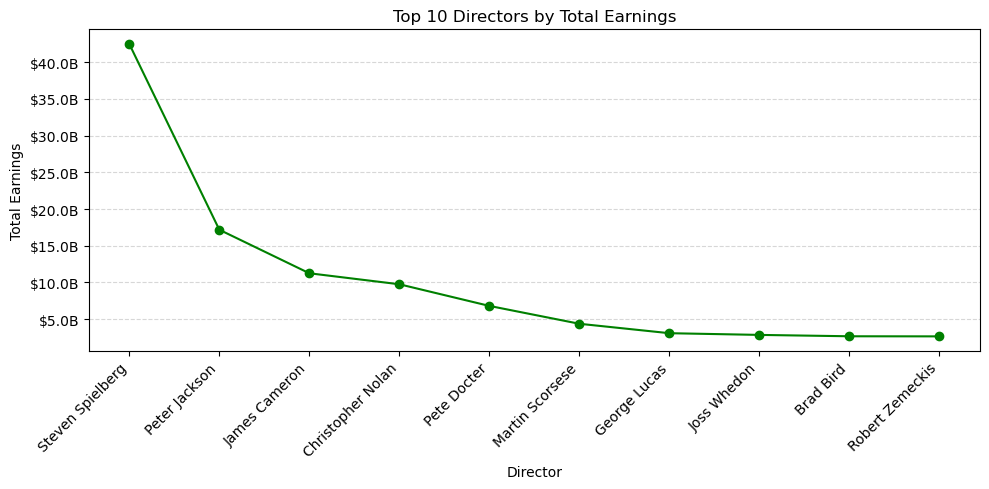

In [79]:
df_tomatoes = all_sets['tomatoes']
df_movies = all_sets['movies']

merging = df_movies.merge(df_tomatoes, on='Director')
grouping = merging.groupby('Director')['Earnings'].sum()

top_10 = grouping.sort_values(ascending=False).head(10)

print(top_10)


# Function to format ticks as billions (e.g., $1.7B)
def billions(x, pos):
    return f'${x * 1e-9:.1f}B'

# Sort directors for correct line connection
top_10_sorted = top_10.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(top_10_sorted.index, top_10_sorted.values, marker='o', linestyle='-', color='green')

plt.title('Top 10 Directors by Total Earnings')
plt.xlabel('Director')
plt.ylabel('Total Earnings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Apply billions formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))

plt.tight_layout()
plt.show()

### Explanation:
This code merges the movies and Rotten Tomatoes datasets on director name, then calculates total earnings per director. It identifies the top 10 directors by earnings and visualizes them using a line plot with earnings formatted in billions.

### 🟢 Conclusion:
Directors like `Steven Spielberg`, `Peter Jackson`, `James Cameron`, and `Christopher Nolan` are among the top earners, showing their massive commercial success in the film industry. These directors have consistently delivered high-grossing films over time.

### Insight 9- Is Present of An Actor effects Movie Earnings And IMDb Score?

In [91]:
df_movies = all_sets['movies'].copy()

# Mean earnings for Actor 1 and Actor 2
earnings_grouping = df_movies.groupby("Actor 1")['Earnings'].mean()
earnings2_grouping = df_movies.groupby("Actor 2")['Earnings'].mean()

# IMDb scores
score_actor1 = df_movies.groupby('Actor 1')['IMDb score'].mean()

# Actor appearance counts
earnings1_count = df_movies['Actor 1'].value_counts()
earnings2_count = df_movies['Actor 2'].value_counts()

# Filter actors with at least 3 appearances
filtered_1 = earnings_grouping[earnings1_count >= 3]
filtered_2 = earnings2_grouping[earnings2_count >= 3]


# Sort and get top 10
top_actor1 = filtered_1.sort_values(ascending=False).head(10)
top_actor2 = filtered_2.sort_values(ascending=False).head(10)
top_scores = score_actor1.sort_values(ascending=False).head(10)

# Print nicely formatted output
print("🎬 Top 10 Leading Actors with Highest Average Box Office Impact (Actor 1):")
for actor, earnings in top_actor1.items():
    print(f"{actor:<25} ${earnings:,.0f}")

print("\n🎬 Top 10 Supporting Actors with Highest Average Box Office Impact (Actor 2):")
for actor, earnings in top_actor2.items():
    print(f"{actor:<25} ${earnings:,.0f}")

print("\n⭐ Top 10 Actors With Aavarge IMDb Score Impact (Actor 1):")
print(top_scores)


🎬 Top 10 Leading Actors with Highest Average Box Office Impact (Actor 1):
CCH Pounder               $699,875,000
Glenn Morshower           $596,666,667
Aidan Turner              $561,750,000
Robert Pattinson          $540,625,000
John Ratzenberger         $413,000,000
Eva Green                 $377,333,333
Bryce Dallas Howard       $357,560,000
Orlando Bloom             $351,400,000
Bingbing Li               $313,333,333
Chris Hemsworth           $301,821,429

🎬 Top 10 Supporting Actors with Highest Average Box Office Impact (Actor 2):
Robert Downey Jr.         $952,333,333
Joel David Moore          $923,333,333
Adam Brown                $758,666,667
Daniel Radcliffe          $740,000,000
Kristen Stewart           $587,000,000
Orlando Bloom             $582,142,857
Josh Hutcherson           $450,000,000
John Ratzenberger         $390,000,000
Jon Hamm                  $377,000,000
Alan Rickman              $361,000,000

⭐ Top 10 Actors With Aavarge IMDb Score Impact (Actor 1):
Actor 1
M

C:\Users\Eslam\AppData\Local\Temp\ipykernel_17024\3710622407.py:12: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  plt.tight_layout()
C:\Users\Eslam\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


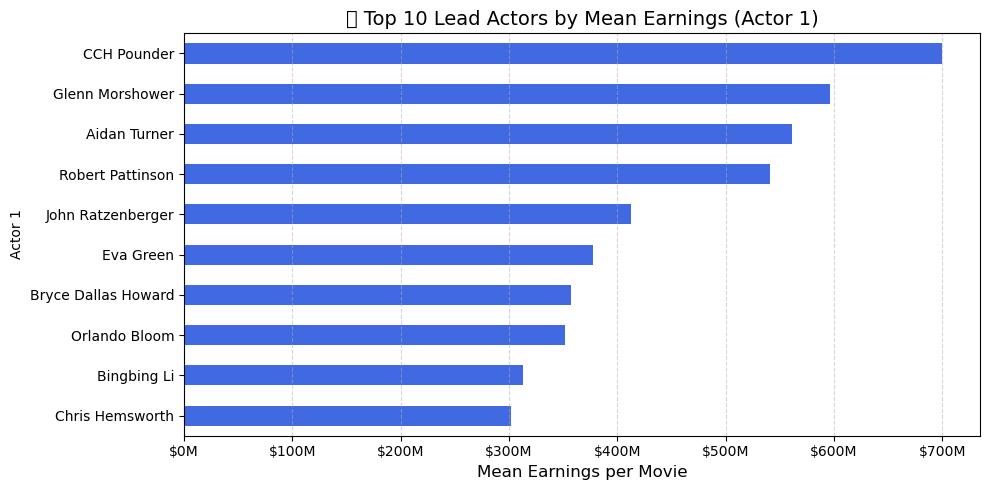

C:\Users\Eslam\AppData\Local\Temp\ipykernel_17024\3710622407.py:23: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  plt.tight_layout()
C:\Users\Eslam\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


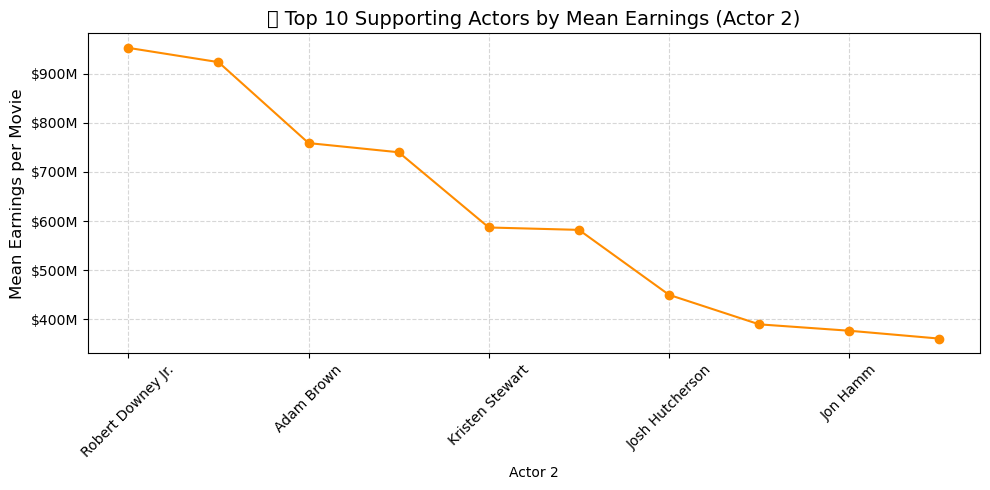

C:\Users\Eslam\AppData\Local\Temp\ipykernel_17024\3710622407.py:34: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  plt.tight_layout()
C:\Users\Eslam\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


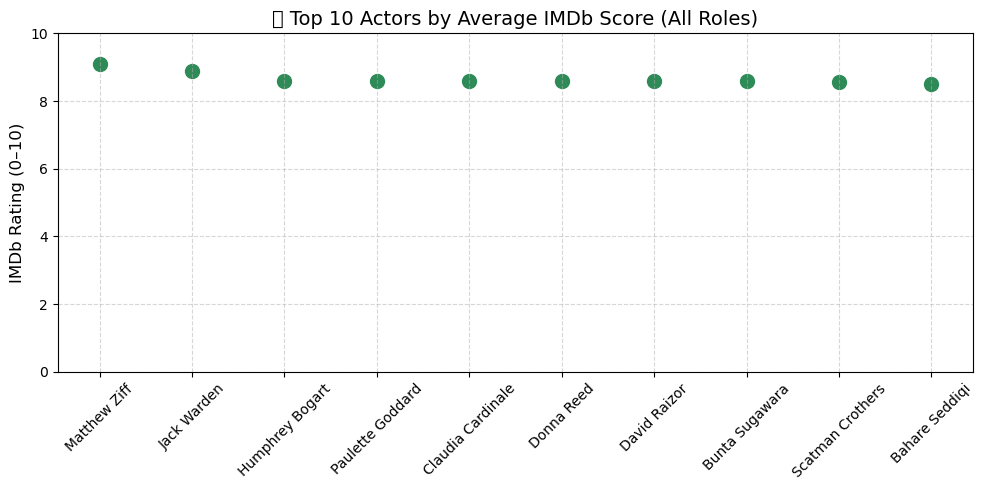

In [98]:
# --- Formatters ---
def format_millions(x, pos):
    return f'${x * 1e-6:.0f}M'

# 1️⃣ Bar Plot – Actor 1 Mean Earnings
plt.figure(figsize=(10, 5))
top_actor1.sort_values().plot(kind='barh', color='royalblue')
plt.title('🎬 Top 10 Lead Actors by Mean Earnings (Actor 1)', fontsize=14)
plt.xlabel('Mean Earnings per Movie', fontsize=12)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_millions))
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2️⃣ Line Plot – Actor 2 Mean Earnings
plt.figure(figsize=(10, 5))
top_actor2.plot(kind='line', marker='o', color='darkorange')
plt.title('🎬 Top 10 Supporting Actors by Mean Earnings (Actor 2)', fontsize=14)
plt.ylabel('Mean Earnings per Movie', fontsize=12)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3️⃣ Scatter Plot – IMDb Ratings
plt.figure(figsize=(10, 5))
plt.scatter(top_scores.index, top_scores.values, color='seagreen', s=100)
plt.title('⭐ Top 10 Actors by Average IMDb Score (All Roles)', fontsize=14)
plt.ylabel('IMDb Rating (0–10)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Explanation:
This code analyzes which actors generate the highest average box office earnings and IMDb scores. It filters for actors who appeared in at least 3 movies to ensure reliability. It then ranks the top 10 lead actors, supporting actors, and those with the highest IMDb-rated films.

### 🟢 Conclusion:
Lead actors like `CCH Pounder`, `Glenn Morshower`, and `Robert Pattinson` had the highest average box office impact. Among supporting actors, `Robert Downey Jr`., `Joel David Moore`, and `Daniel Radcliffe` stood out with exceptionally high earnings. Meanwhile, actors such as `Matthew Ziff`, `Humphrey Bogart`, and `Donna Reed` topped the list for highest average IMDb scores, showing strong critical reception. This highlights a mix of commercial power and artistic recognition across various performers.

### Insight 10 - Top 10 Movies with Heighst Box Office  

In [52]:
df_movies = all_sets['movies']

grouping = df_movies.groupby('Movie')['Box Office'].sum()
top_10 = grouping.sort_values(ascending=False).head(10)

print(top_10)

Movie
Avatar                                       2923000000
Skyfall                                      2210000000
Titanic                                      2200000000
The Avengers                                 2142000000
The Jungle Book                              1933000000
Spider-Man 3                                 1780000000
Jurassic World                               1670000000
The Twilight Saga: Breaking Dawn - Part 2    1659000000
Frozen                                       1509000000
Avengers: Age of Ultron                      1405000000
Name: Box Office, dtype: int64


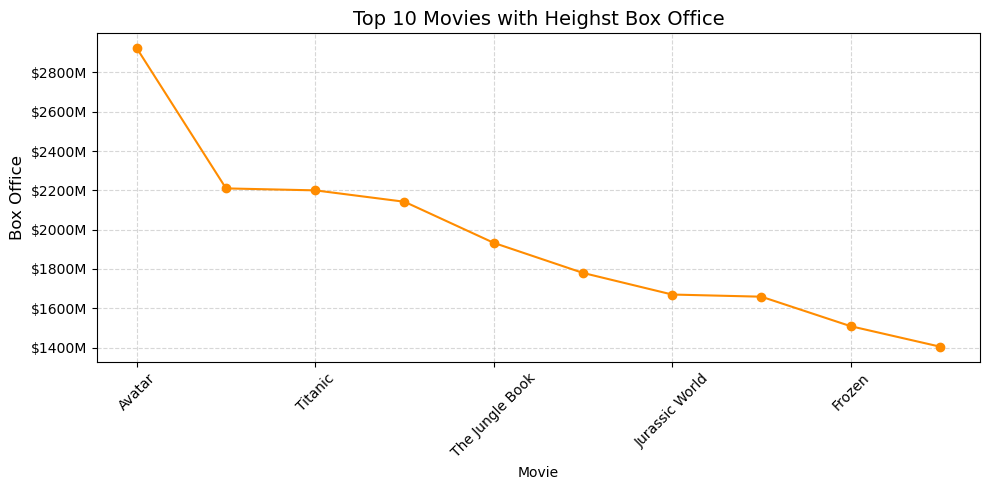

In [56]:
# --- Formatters ---
def format_millions(x, pos):
    return f'${x * 1e-6:.0f}M'
    
#Plot
plt.figure(figsize=(10, 5))
top_10.plot(kind='line', marker='o', color='darkorange')
plt.title('Top 10 Movies with Heighst Box Office', fontsize=14)
plt.ylabel('Box Office', fontsize=12)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Final Report :

## 🧾 Final Summary of Insights:

##### This project analyzed various aspects of movie performance using datasets from Rotten Tomatoes, IMDb, and the Oscars, focusing on factors like ratings, genres, earnings, durations, and actor/director impact.

1. **Top Rated Movies (Rotten Tomatoes):**

    The top 30 movies based on cumulative Rotten Tomatoes ratings were identified, highlighting films that received widespread critical acclaim.

3. **Most Active Years:**

    The years with the highest number of movies in the Rotten Tomatoes dataset were identified, indicating peak periods of film production or data  coverage.

5. **Popular Genres:**

    The most common genres were revealed, showing that categories like action, drama, and adventure are dominant in the dataset.

7. **Director Performance (Ratings):**

   Directors such as Quentin Tarantino and others ranked highly in terms of average ratings on both Rotten Tomatoes and IMDb, though the top names differed across platforms — emphasizing the gap between critic and audience preferences.

9. **Movie Duration Impact:**

   Movies lasting between 100 and 130 minutes generally had higher average IMDb scores, suggesting this is the “sweet spot” for audience satisfaction.

11. **Oscar-Winning Actors:**

    Actors like Daniel Day-Lewis and Jack Nicholson stood out for receiving multiple Oscars for Best Actor, while Meryl Streep and Katharine Hepburn led among actresses.

13. **Top-Grossing Directors:**

    Directors such as Steven Spielberg, James Cameron, and Christopher Nolan topped the list for total box office earnings, highlighting their long-term commercial success.

15. **Actor Impact (Box Office):**

    Lead actors like CCH Pounder and Robert Pattinson had the highest average box office performance, while supporting actors like Robert Downey Jr. and Daniel Radcliffe also showed strong financial impact.

17. **Actor Impact (IMDb Scores):**

    Actors such as Matthew Ziff, Humphrey Bogart, and Donna Reed consistently appeared in high-rated films, showing strong critical appreciation.

## ✅ Conclusion:
This project provided a comprehensive look into the film industry by analyzing ratings, earnings, genres, durations, and award data. It revealed how different factors like director influence, actor roles, and movie length affect both critical reception and commercial success. Overall, the findings highlight the diversity of what defines a successful film — whether through box office numbers, high ratings, or award recognition.